In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# CArregar Dataset
df_salario = pd.read_csv('.\dataset\salarios.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_19928\1484184055.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_salario = pd.read_csv('.\dataset\salarios.csv')


In [3]:
# Inspecionar a estrutura do DF
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
# Copia DF para DF-EDA
df_salario_eda = df_salario.copy()

In [5]:
# Copia DF para DF-Bucketing
df_salario_bucketing = df_salario.copy()

## EDA

In [6]:
# Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [7]:
# Detectar valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [8]:
# Medidas estatísticas do DF
round(df_salario_eda.describe(), 2)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.00,1000.00,1000.00
mean,59.71,5.47,5093.73
std,34.03,2.89,4536.17
min,1.00,1.00,538.56
25%,30.75,3.00,1537.48
50%,60.00,6.00,3237.92
75%,89.00,8.00,7436.68
max,120.00,10.00,18923.23


<Axes: ylabel='tempo_na_empresa'>

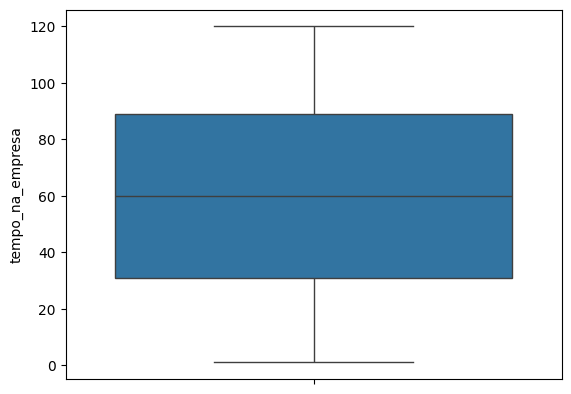

In [9]:
# Verificar Outliers
sns.boxplot(data=df_salario_eda, y='tempo_na_empresa')

<Axes: ylabel='nivel_na_empresa'>

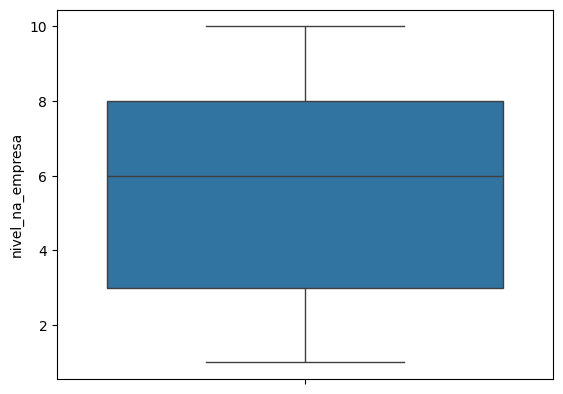

In [10]:
# Verificar Outliers
sns.boxplot(data=df_salario_eda, y='nivel_na_empresa')

<Axes: ylabel='salario_em_reais'>

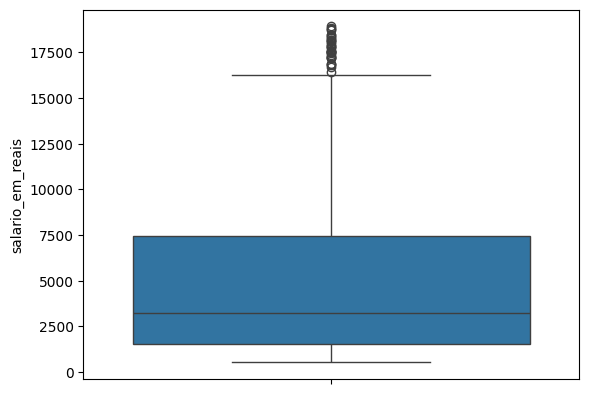

In [11]:
# Verificar Outliers
sns.boxplot(data=df_salario_eda, y='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

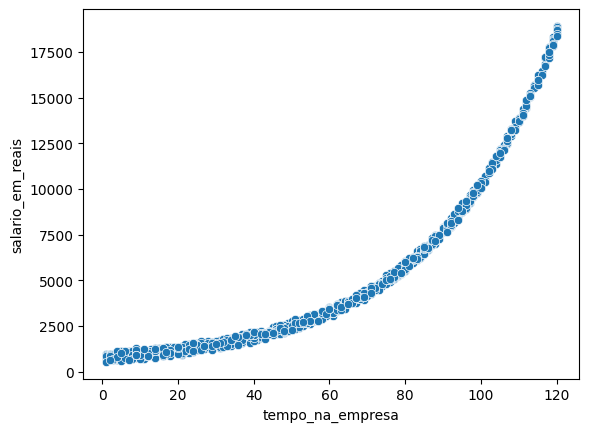

In [12]:
# Cruzamento das variáveis independentes com variavel dependente (salario em reais)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

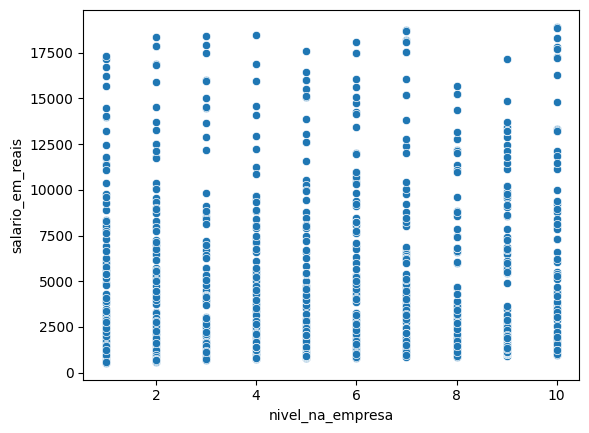

In [13]:
# Cruzamento das variáveis independentes com variavel dependente (salario em reais)
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='nivel_na_empresa'>

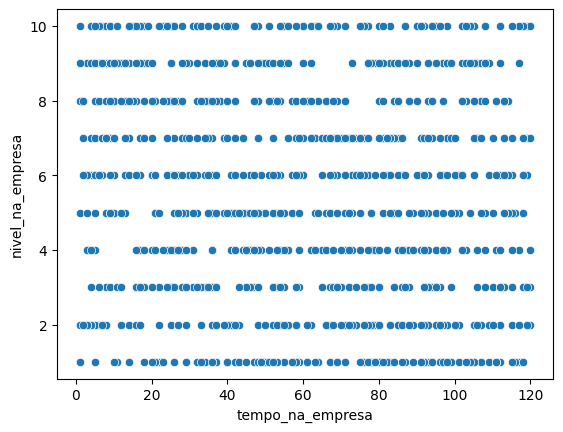

In [14]:
# Cruzamento das variáveis independentes com variavel dependente (salario em reais)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='nivel_na_empresa')

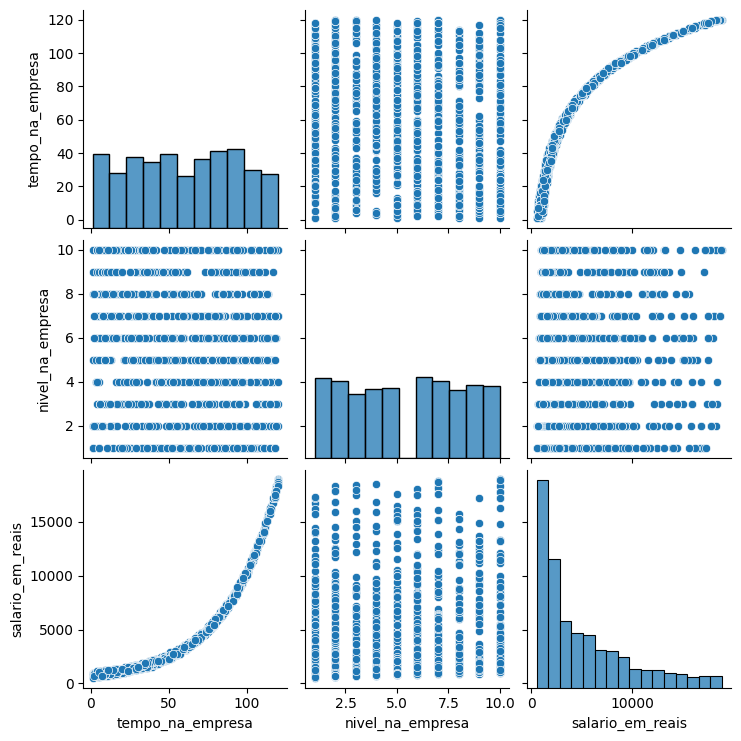

In [15]:
# Histogramas das variaveis
sns.pairplot(df_salario_eda)

<Axes: >

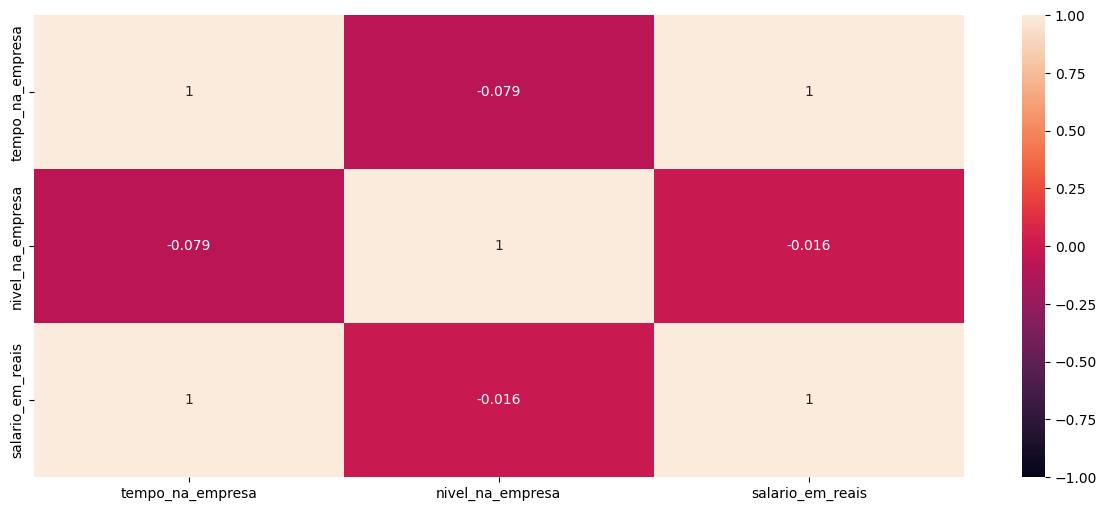

In [16]:
# Mapa de Calor
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

- Correlação de Spearman é perfeita para identificar correlações não lineares

<Axes: >

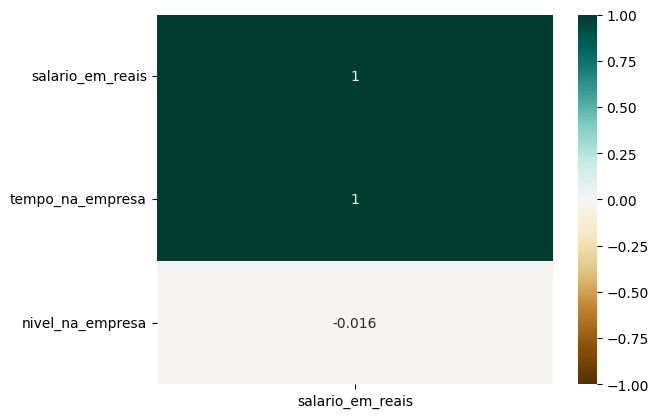

In [17]:
# Formato de Rancking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [18]:
# Bucketing tempo de casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', 
                     '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'],
bins=bins_tempo_casa, labels=labels_tempo_casa, include_lowest=True)

In [19]:
df_salario_bucketing.head(5)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

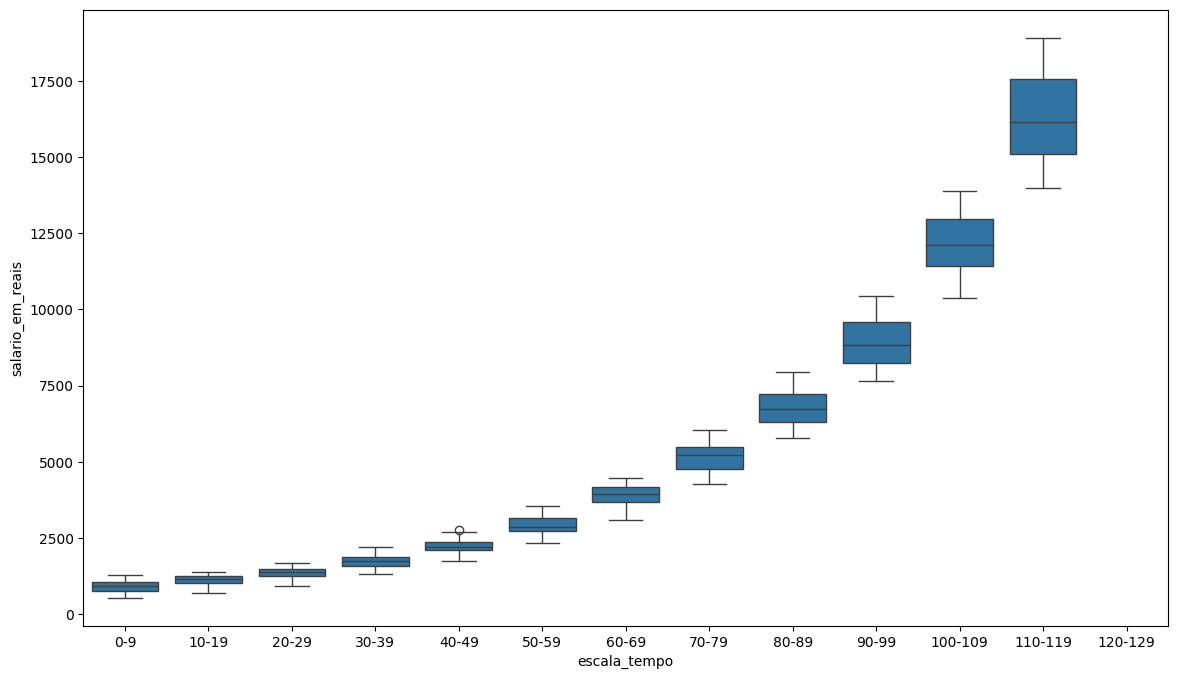

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinar Modelo Linear

- Usaremos o conceito de validação cruzada, dividir os dados em 5 partes e treinar o modelo 5 vezes fazendo iterações entre conjunto de treino e teste, monitorando o overfitting


In [21]:
# Importar Biblioteca

# Fazer os splits dos dados
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
# Fazer a engenharia de Features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Transformação de colunas
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

# Biblioteca de Algebra Linear (Base do Pandas)
import numpy as np

In [22]:
# Criar Dataset de Treino e Teste
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [23]:
# Spit usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [24]:
# Bloco para Treinamento do Modelo

# Pipeline
# Padronizar variávies numéricas - tempo_na_emprasa, nivel_na_empresa

# Nomes das Colunas - variavel armazenando os nomes das colunas que vou transformar
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para colunas_numericas
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler()) #criando a escala padronizada das colunas 
])

# Criar um ColumTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
        # Indicar nome do transformer, o transformar a ser usado e onde ele deve ser aplicado
    ]
)

# Criando o Pipeline Principal = pre- processamento + Treinamento
model_regr = Pipeline(steps=[('prepocessor', preprocessor),
                             ('regressor', LinearRegression())
                             ])

# Vamos validar o overfitting do modelo extraindo as metricas tanto do conjunto de treinamento 
# como no de teste para fazer predições e verificar se a diferença do erro entre os dois está alta.

# Armazenar RMSE Treino e Teste 
rmse_score_fold_train = []
rmse_score_fold_test = []

# Armazenar r2_score de Teste
r2score_fold_test = [] # Como o r2score tem o valor entre 0 e 1 não precisamos extrair dos dois conjuntos, apenas de um

# Armazenar Resíduos
residuos = []

# Armazenar as Predições
y_pred_total = []

for train_index, test_index in kf.split(X): # Os indices de X são os mesmos de Y
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index] # Determinar os conjuntos de treino e teste atravez dos indices, 
                                                               # o iloc vai trazer um conjunto de dados com base no _index
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treine o modelo do conjunto de treinamento
    model_regr.fit(X_train, y_train)

    # Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcule o RMSE para os conjuntos de treinamento e teste
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    # Calcular R2 Score e Resíduos para conjunto de Teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenando métricas da iteração na lista
    rmse_score_fold_train.append(rmse_train)
    rmse_score_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

# Calculando a média entre as metricas
rmse_train_final = np.mean(rmse_score_fold_train)
rmse_test_final = np.mean(rmse_score_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
# Mais um indicador para validar overfitting ou underfitting
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
 # Transformando lista de listas em uma lista úncica (unidimencional) usando reshape()
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)


### Análise de Métricas - Modelo Linear


In [25]:
# Métricas
print(f'RMSE Treino: {round(rmse_train_final, 2)}')
print(f'RMSE Teste: {round(rmse_test_final, 2)}')
print(f'% Dif RMSE Treino e Teste: {round(percentual_rmse_final, 2)}')
print(f'R2Score Teste: {round(r2score_test_final, 2)}')

RMSE Treino: 1882.83
RMSE Teste: 1886.45
% Dif RMSE Treino e Teste: 0.19
R2Score Teste: 0.83


- Consiguimos observar que a diferença entre treino e teste é baixa, não podemos afirmar um overfitting neste modelo Linear

### Análise de Resíduos - Modelo Linear
- Idicadores Gráficos

In [26]:
# Transformar os resíduos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos

array([ 1129.37637218, -1367.74022414, -1220.10999404,  1637.06777965,
         -97.87142952, -1437.30620404,  1290.73668495,  2757.51292229,
         599.50358423, -1104.32490692,   247.92248953,  1634.71277463,
       -1663.66462165,  -484.1937567 ,  -750.39020594,   918.7174481 ,
       -1755.83059208,  -372.15360032,   398.30290351, -1708.2109602 ,
        -125.76004008, -1574.85965377,  -745.11287356,   353.24620615,
       -1622.74100607, -2190.75386722, -1867.37958023,  3752.57219553,
       -1337.90002188, -1106.47820956,  5636.41964732,   649.47741171,
       -2033.83693063,  2466.05464212, -1130.88523789,  -821.18083148,
       -1091.2950633 , -1937.30623155,   689.21734689,  1919.65721801,
        -662.37382135,  1799.97303222,  2083.54731922,   747.08734689,
        -153.66526539,  -537.96931332, -2168.06490675, -1442.47033465,
        -557.16953436, -1768.79542194, -1093.9050633 ,    90.1652218 ,
        -498.00969074,  2622.18830357, -1592.46822776,  -815.80057388,
      

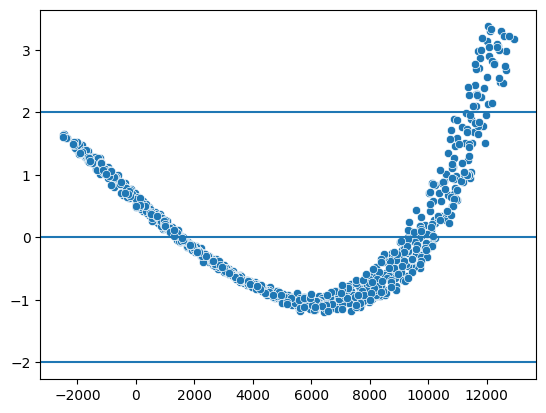

In [27]:
# Verificar a Linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verificar a homocedasticidade: Valores em torno da reta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=2)
plt.axhline(y=0)
plt.axhline(y=-2)

- Primeiro indicador de que não há linearidade ou homocedasticidade, ou seja, que não é um padrão linear

Text(0, 0.5, 'Resíduos na Escala Padrão')

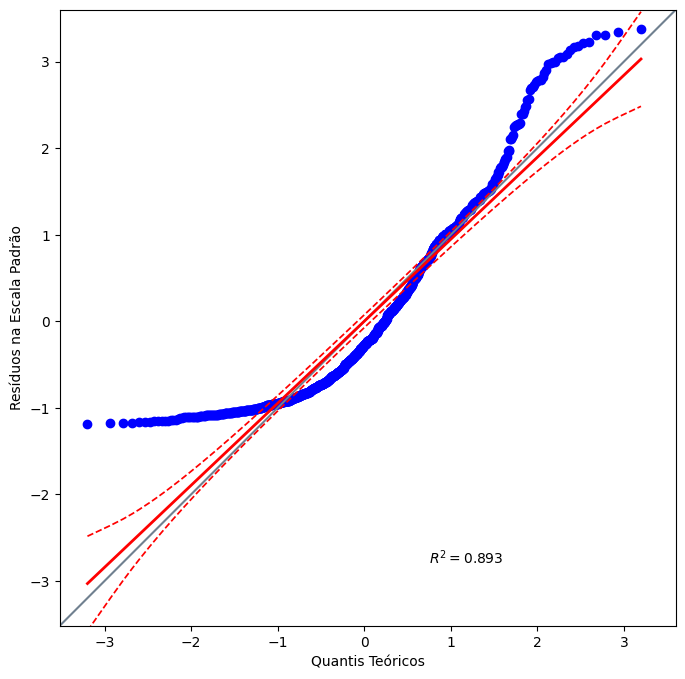

In [28]:
# Checar se resíduos seguem uma distribuição normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")

- Medidas indicadoras de distribuição normal 

In [29]:
#  Teste de normalidade Shapiro_Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stats_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estat. Teste: {stats_shapiro} e P-Value: {p_value_shapiro}")

Estat. Teste: 0.8919692179652284 e P-Value: 7.013497918014399e-26


In [30]:
#  Teste de normalidade Kolmogorov-Smirnov
stats_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estat. Teste: {stats_ks} e P-Value: {p_value_ks}")

Estat. Teste: 0.5939999999999955 e P-Value: 0.0


In [31]:
#  Teste de normalidade Lilliefors
stats_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste: {stats_ll} e P-Value: {p_value_ll}")

Estat. Teste: 0.11825983774680088 e P-Value: 0.0009999999999998899


- Nenhuma métrica validou uma distribuição normal, não podemos criar um __Modelo Supervisionado__ através deste __dataset__ aplicando uma __Regressão Linear__ 

## Treinar Modelo Polinomial

In [32]:
# Exemplo de criação de Features Polinomiais
feat_poly = PolynomialFeatures(degree=3, # parâmetro degree=grau do polinômio, até quandos graus vamos gerar features polinomiais
                               include_bias=False # parâmetro include_bias=(valor booleano) cria uma feature constante com valor 1 
                               ) 
X_poly = feat_poly.fit_transform(X) #
feat_poly.feature_names_in_ # Indentificar se estamos trabalhando com as features corretas de entrada 


array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [33]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

- O output acima mostra a engenharia de features feita pelo objeto __feat_poly__, elevou algumas features e mutiplicou outras.
---
- Features que receberam grau de elevação
--'tempo_na_empresa^2' |
--'nivel_na_empresa^2' |
--'tempo_na_empresa^3' | 
--'nivel_na_empresa^3' |
- Features que foram multiplicadas ou somadas
--'tempo_na_empresa nivel_na_empresa' |
--'tempo_na_empresa^2 nivel_na_empresa' |
--'tempo_na_empresa nivel_na_empresa^2' |
---
- Estamos criandos mais features com base em polinômios para dar mais repertório para o modelo aprender padrões diferentes de treinamento

In [51]:
# Bloco para Treinamento do Modelo

# graus_poly = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Todos os graus de polinomios que vamos testar
graus_poly = [4]

# Armazenar as métricas do grau do polinomio
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Spit usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in  graus_poly:

    # Pipeline
    # Padronizar variávies numéricas - tempo_na_emprasa, nivel_na_empresa

    # Nomes das Colunas - variavel armazenando os nomes das colunas que vou transformar
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para colunas_numericas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler()) #criando a escala padronizada das colunas 
    ])

    # Criar um ColumTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
            # Indicar nome do transformer, o transformar a ser usado e onde ele deve ser aplicado
        ]
    )

    # Criar features Polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Criando o Pipeline Principal = pre- processamento + Treinamento
    model_poly = Pipeline(steps=[('prepocessor', preprocessor),
                                 ('poly_features', poly_feat),
                                ('regressor', LinearRegression())
                                ])

    # Vamos validar o overfitting do modelo extraindo as metricas tanto do conjunto de treinamento 
    # como no de teste para fazer predições e verificar se a diferença do erro entre os dois está alta.

    # Armazenar RMSE Treino e Teste 
    rmse_score_fold_train = []
    rmse_score_fold_test = []

    # Armazenar r2_score de Teste
    r2score_fold_test = [] # Como o r2score tem o valor entre 0 e 1 não precisamos extrair dos dois conjuntos, apenas de um

    # Armazenar Resíduos
    residuos = []

    # Armazenar as Predições
    y_pred_total = []

    for train_index, test_index in kf.split(X): # Os indices de X são os mesmos de Y
        X_train, X_test  = X.iloc[train_index], X.iloc[test_index] # Determinar os conjuntos de treino e teste atravez dos indices, 
                                                                # o iloc vai trazer um conjunto de dados com base no _index
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treine o modelo do conjunto de treinamento
        model_poly.fit(X_train, y_train)

        # Faça predições nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcule o RMSE para os conjuntos de treinamento e teste
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        # Calcular R2 Score e Resíduos para conjunto de Teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenando métricas da iteração na lista
        rmse_score_fold_train.append(rmse_train)
        rmse_score_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    # Calculando a média entre as metricas
    rmse_train_final = np.mean(rmse_score_fold_train)
    rmse_test_final = np.mean(rmse_score_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    # Mais um indicador para validar overfitting ou underfitting
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    # Transformando lista de listas em uma lista úncica (unidimencional) usando reshape()
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)
    
    # Armazenar o valor final do grau do polinomio
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)




c:\Users\HP\.virtualenvs\regressao_polinomial-GFmNs1Zh\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\HP\.virtualenvs\regressao_polinomial-GFmNs1Zh\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\HP\.virtualenvs\regressao_polinomial-GFmNs1Zh\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\HP\.virtualenvs\regressao_polinomial-GFmNs1Zh\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

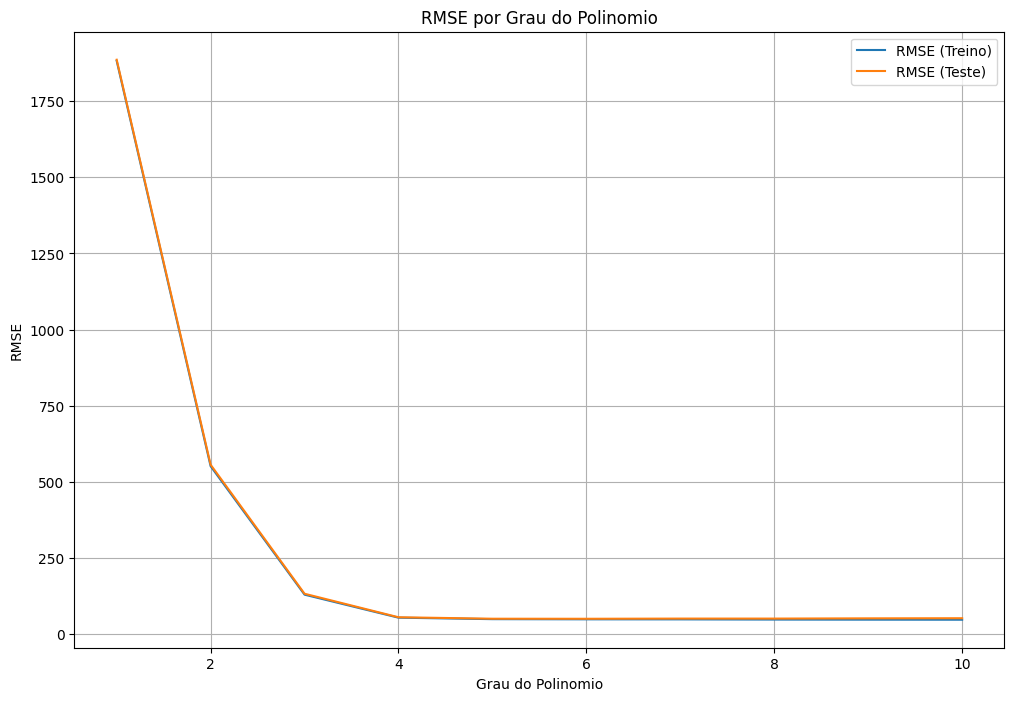

In [50]:
# Plotar Gráfico para Comparar RMSE por Grau de Polinomio
plt.figure(figsize=(12,8))
plt.plot(graus_poly, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_poly, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau do Polinomio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau do Polinomio')
plt.legend()
plt.grid(True)
plt.show()


- O Gráfico mostra uma queda muito grande dos valores até o 3º grau, a partir do 4º grau vemos uma estabilização dos erros, mostrando-se promissor para o treinamento do modelo
---
- As linhas estão se sobrepondo, pois os valores são minimamente  próximos, não apresentam um overfitting. Porém temos que avaliar a diferença percentual entre os conjuntos. 



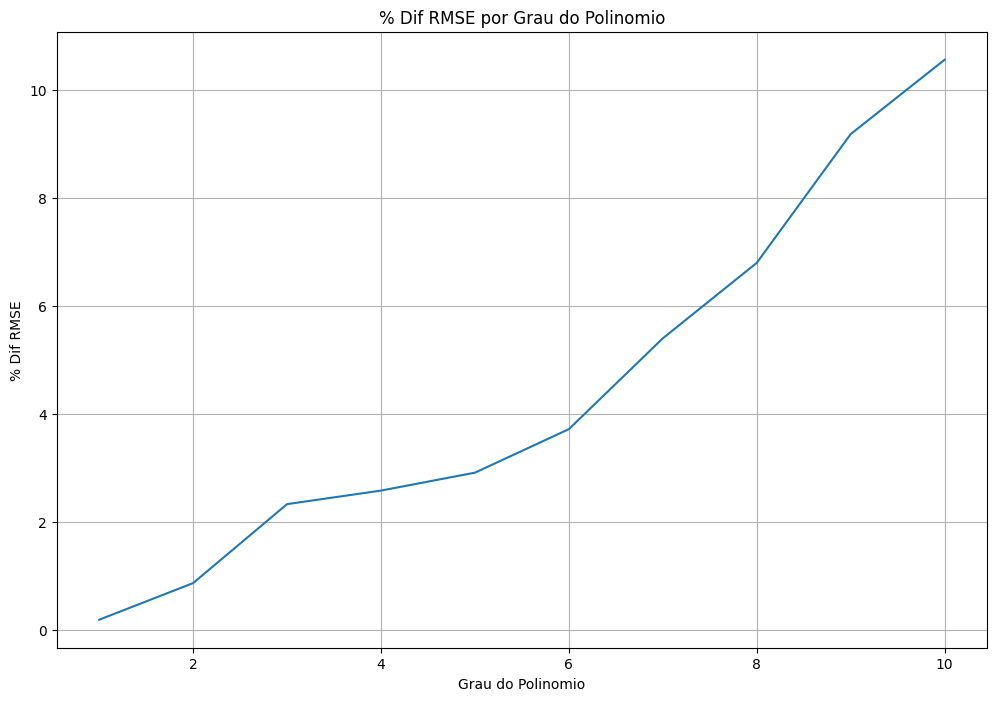

In [36]:
# Plotar Gráfico para Comparar % Dif. RMSE (Treino e Teste)
plt.figure(figsize=(12,8))
plt.plot(graus_poly, percentual_rmse_values, label='% Dif RMSE Treino e Teste')
plt.xlabel('Grau do Polinomio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau do Polinomio')
plt.grid(True)
plt.show()


- Novamente, o polinomio de grau 4 mostra-se promissor, pois a diferença do percentual começa a ser muito alta a partir dele. 

### Análise de Métricas - Modelo Polinomial

In [54]:
# Métricas
print(f'RMSE Treino: R${round(rmse_train_final, 2)}')
print(f'RMSE Teste: R${round(rmse_test_final, 2)}')
print(f'% Dif RMSE Treino e Teste: {round(percentual_rmse_final, 2)}%')
print(f'R2Score Teste: {round(r2score_test_final, 2)}')

RMSE Treino: R$53.33
RMSE Teste: R$54.71
% Dif RMSE Treino e Teste: 2.58%
R2Score Teste: 1.0


- Depois dessa análise percebemos uma grande melhora, as metricas estão boas, uma diferença mínima entre *Treino* e *Teste* o que não configura um overfitting, R2 Score apresentando uma *Linearidade Perfeita* mostra que temos um bom modelo

### Análise de Resíduos - Modelo Polinomial
- Idicadores Gráficos

In [38]:
# Transformar os resíduos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos

array([-4.97858349e+01,  4.73576642e+00,  1.40414685e+01,  3.23153435e+01,
       -9.34936074e+01, -8.71565936e+01,  1.50561137e+00, -5.90085922e+01,
        4.10769380e+01, -6.40890190e+01, -2.19190763e+01,  2.25027835e+01,
        8.71715480e+01, -9.80169715e+01, -5.53199936e+01,  9.01838971e+00,
        9.38744360e+01, -1.69598960e+01, -4.27655179e+01,  1.96101209e+00,
       -4.48684699e+01,  1.19110588e+01, -1.20354622e+01,  1.97341976e+01,
       -2.23593577e+01, -1.24572718e+02,  1.47406535e+01,  1.51446793e+01,
        1.05678372e+02, -5.78899434e+01, -1.16891709e+01, -3.21314434e+00,
       -6.35607269e+01,  2.90367743e+01,  9.40396827e+00,  1.30634409e+01,
        5.13533233e+00,  5.71282084e+01, -9.99864723e+01, -2.36444949e+01,
        7.69890215e+01,  4.51399263e+00, -5.43681651e+01, -4.21164723e+01,
        2.43606813e+01, -5.47595518e+01,  1.57662347e+01,  8.66588644e+01,
       -1.18645337e+02,  7.06829343e+01,  2.52533233e+00,  1.15697753e+02,
       -1.57377534e+01,  

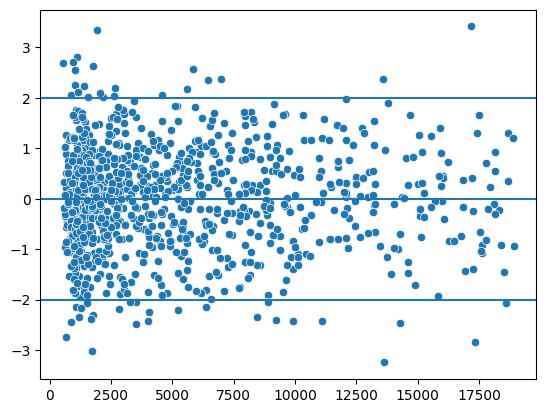

In [39]:
# Verificar a Linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verificar a homocedasticidade: Valores em torno da reta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=2)
plt.axhline(y=0)
plt.axhline(y=-2)

- Primeiro indicador de que há linearidade, mas se tratando de homocedasticidade percebemos que temos mais expalhados, ou seja, o modelo polinomial é mais indicado para ser treinado

Text(0, 0.5, 'Resíduos na Escala Padrão')

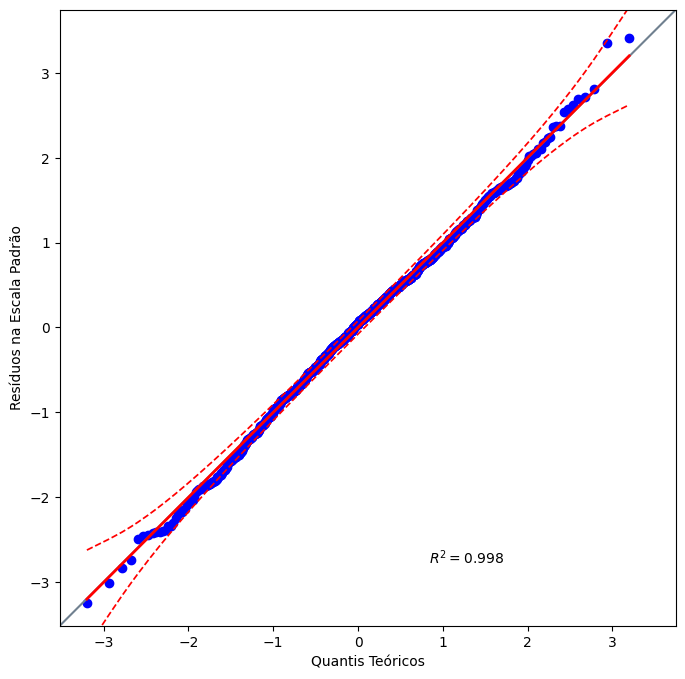

In [40]:
# Checar se resíduos seguem uma distribuição normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")

- Agora o modelo precorre mais em torno da reta, mas temos poucos pontos vazando pelas bandas de segurança

### Teste de distribuição normal 

In [56]:
#  Teste de normalidade Shapiro_Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stats_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estat. Teste: {stats_shapiro} e P-Value: {p_value_shapiro}")

Estat. Teste: 0.9986951372205314 e P-Value: 0.6852797159653821


In [55]:
#  Teste de normalidade Kolmogorov-Smirnov
stats_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estat. Teste: {stats_ks} e P-Value: {p_value_ks}")

Estat. Teste: 0.48237446499531467 e P-Value: 1.2202460106362345e-214


In [57]:
#  Teste de normalidade Lilliefors
stats_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste: {stats_ll} e P-Value: {p_value_ll}")

Estat. Teste: 0.01363734689497953 e P-Value: 0.9566270022046024


- Validamos que não seria possível criar um __Modelo Supervisionado__ aplicando uma __Regressão Linear__. Foi necessário testar a aplicação de uma __Regrssão Polinomial__, que por sinal se mostrou mais eficaz para *Treinar o Modelo*, pois suas métricas e resíduos estão dentro da normalidade, excluindo a configuração de um *Overfitting* 

## Realizar Presições Individuais

In [63]:
input_features = {
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 5
}

pred_df = pd.DataFrame(input_features, index=[1])

In [64]:
model_poly.predict(pred_df)

array([5747.79896506])

- Fazendo alguns teste observamos que a variavel mais importante do modelo é 'tempo_na_empresa'

In [65]:
import joblib
joblib.dump(model_poly, '.\modelo_salario.pkl')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\HP\AppData\Local\Temp\ipykernel_19928\3930696664.py:2: SyntaxWarning: invalid escape sequence '\m'
  joblib.dump(model_poly, '.\modelo_salario.pkl')


['.\\modelo_salario.pkl']